<a href="https://colab.research.google.com/github/Romema1/Romema1/blob/main/Answer%20Assignment%203%20ISE%20571_PartII_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyswarms

In [ ]:
import numpy as np
import pyswarms as ps

# ----- Problem Data -----

# Full-time staff rates (m = 5)
full_time_rates = np.array([30, 35, 40, 45, 50])
# Overtime rates (1.5x)
overtime_rates = 1.5 * full_time_rates  # [45, 52.5, 60, 67.5, 75]

# Part-time staff rates (n = 5)
part_time_rates = np.array([25, 27, 29, 31, 33])

# Number of staff groups
m = len(full_time_rates)
n = len(part_time_rates)

# Total dimension of decision vector:
# 5 full-time + 5 overtime + 5 part-time = 15
dim = m + m + n

# Staffing constraints:
min_full_time = 4   # At least 4 full-time staff during peak hours (count as sum of hours; here we assume hours are in some unit)
min_part_time = 2   # At least 2 part-time staff during non-peak hours

# To incorporate constraints in a continuous optimization via PSO, we use a penalty method.
# We assume that if the total scheduled "hours" are less than required, we add a penalty.
# (In a real scheduling problem, you might have integer decisions or binary selection; here we assume hours as continuous variables.)

# ----- Fitness Function Definition -----
def fitness_function(x):
    """
    x is a 2D array with shape (n_particles, dim)
    x has 15 components:
      - x[0:5] are full-time peak hours,
      - x[5:10] are full-time overtime hours,
      - x[10:15] are part-time non-peak hours.
    We compute total cost and add penalties if constraints are violated.
    """
    # Compute cost for each particle
    # Cost for full-time peak hours
    cost_full_time = np.dot(x[:, 0:m], full_time_rates)
    # Cost for overtime
    cost_overtime = np.dot(x[:, m:2*m], overtime_rates)
    # Cost for part-time
    cost_part_time = np.dot(x[:, 2*m:2*m+n], part_time_rates)

    total_cost = cost_full_time + cost_overtime + cost_part_time

    # Constraint penalties:
    # Constraint 1: Sum of full-time (peak + overtime) >= 4
    sum_full = np.sum(x[:, 0:m] + x[:, m:2*m], axis=1)
    # Constraint 2: Sum of part-time hours >= 2
    sum_part = np.sum(x[:, 2*m:2*m+n], axis=1)

    # Penalty factors (set large to discourage infeasible solutions)
    penalty_factor = 1e6

    penalty = np.zeros(x.shape[0])
    # If sum_full < min_full_time, add penalty proportional to the deficit squared.
    penalty += penalty_factor * np.maximum(0, (min_full_time - sum_full))**2
    # If sum_part < min_part_time, add penalty.
    penalty += penalty_factor * np.maximum(0, (min_part_time - sum_part))**2

    # Total fitness: we want to minimize cost, so fitness value is total_cost + penalty.
    # PSO in PySwarms minimizes the fitness function.
    fitness = total_cost + penalty
    return fitness

# ----- PSO Setup -----

# Define bounds for each decision variable.
# We need non-negative hours. Assume an upper bound for hours, say 10 hours per period (adjust as needed).
lb = np.zeros(dim)
ub = 10 * np.ones(dim)
bounds = (lb, ub)

# PSO parameters
options = {'w': 0.9, 'c1': 0.5, 'c2': 0.3}
swarm_size = 50
iterations = 1000

# ----- Run PSO using PySwarms -----

optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size, dimensions=dim, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(fitness_function, iters=iterations, verbose=True)

# ----- Display the Results -----
print("#"*30)
print("Optimal Workforce Schedule (Decision Variables):")
print(np.round(best_pos, 3))
print("\nMinimum Total Labor Cost (with penalties if any):")
print(np.round(best_cost, 2))

# Interpret the result:
print("\nInterpretation:")
print("Full-time peak hours (first 5 entries):", np.round(best_pos[0:m], 3))
print("Full-time overtime hours (next 5 entries):", np.round(best_pos[m:2*m], 3))
print("Part-time non-peak hours (last 5 entries):", np.round(best_pos[2*m:2*m+n], 3))
print("\nStaffing sums:")
print("Total full-time (peak + overtime):", np.round(np.sum(best_pos[0:m] + best_pos[m:2*m]), 3))
print("Total part-time:", np.round(np.sum(best_pos[2*m:2*m+n]), 3))


2025-04-01 03:50:45,506 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'w': 0.9, 'c1': 0.5, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=726
2025-04-01 03:50:47,515 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 725.5008447068847, best pos: [1.23419156 0.53717537 0.91994747 1.12904433 0.80400712 3.05492025
 0.79923044 1.48200482 0.02369437 0.42188184 1.24217783 2.12811876
 2.42503475 1.91759365 0.66641939]


##############################
Optimal Workforce Schedule (Decision Variables):
[1.234 0.537 0.92  1.129 0.804 3.055 0.799 1.482 0.024 0.422 1.242 2.128
 2.425 1.918 0.666]

Minimum Total Labor Cost (with penalties if any):
725.5

Interpretation:
Full-time peak hours (first 5 entries): [1.234 0.537 0.92  1.129 0.804]
Full-time overtime hours (next 5 entries): [3.055 0.799 1.482 0.024 0.422]
Part-time non-peak hours (last 5 entries): [1.242 2.128 2.425 1.918 0.666]

Staffing sums:
Total full-time (peak + overtime): 10.406
Total part-time: 8.379


2025-04-01 03:56:32,157 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'w': 0.9, 'c1': 1.49, 'c2': 1.49}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=1.05e+3
2025-04-01 03:56:38,649 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1050.5644961481505, best pos: [4.80941391 0.08796036 1.09790087 0.86673378 2.66352545 1.56820003
 1.67625536 1.39503096 0.41536987 0.34968158 3.32605374 4.10892113
 2.42394414 1.96630731 1.97661119]


##############################
Optimal Workforce Schedule (Decision Variables):
[4.809 0.088 1.098 0.867 2.664 1.568 1.676 1.395 0.415 0.35  3.326 4.109
 2.424 1.966 1.977]

Minimum Total Labor Cost (with penalties if any):
1050.56

Interpretation:
Full-time peak hours (first 5 entries): [4.809 0.088 1.098 0.867 2.664]
Full-time overtime hours (next 5 entries): [1.568 1.676 1.395 0.415 0.35 ]
Part-time non-peak hours (last 5 entries): [3.326 4.109 2.424 1.966 1.977]

Staffing sums:
Total full-time (peak + overtime): 14.93
Total part-time: 13.802


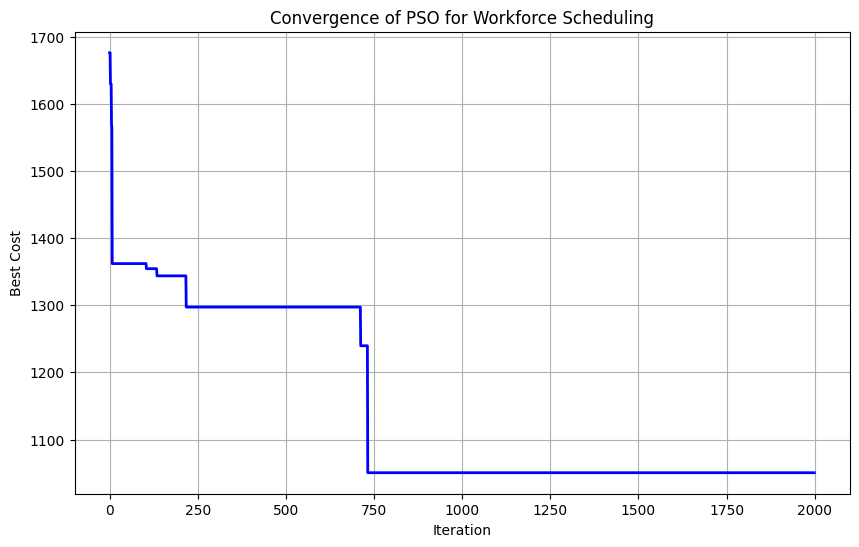

In [ ]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt

# ----- Problem Data -----

# Full-time staff rates (m = 5)
full_time_rates = np.array([30, 35, 40, 45, 50])
# Overtime rates (1.5x full-time rates)
overtime_rates = 1.5 * full_time_rates  # [45, 52.5, 60, 67.5, 75]

# Part-time staff rates (n = 5)
part_time_rates = np.array([25, 27, 29, 31, 33])

# Number of staff groups
m = len(full_time_rates)
n = len(part_time_rates)

# Total dimension of decision vector:
# 5 full-time + 5 overtime + 5 part-time = 15
dim = m + m + n

# Staffing constraints:
min_full_time = 4   # At least 4 full-time hours (peak + overtime) must be scheduled
min_part_time = 2   # At least 2 part-time hours must be scheduled

# ----- Fitness Function Definition -----
def fitness_function(x):
    """
    x: 2D array with shape (n_particles, dim)
       x[0:5]   are full-time peak hours,
       x[5:10]  are full-time overtime hours,
       x[10:15] are part-time non-peak hours.

    The fitness function computes the total labor cost plus a penalty if staffing constraints are violated.
    Lower fitness values are better.
    """
    # Cost components:
    cost_full_time = np.dot(x[:, 0:m], full_time_rates)
    cost_overtime  = np.dot(x[:, m:2*m], overtime_rates)
    cost_part_time = np.dot(x[:, 2*m:2*m+n], part_time_rates)

    total_cost = cost_full_time + cost_overtime + cost_part_time

    # Staffing constraints:
    sum_full = np.sum(x[:, 0:m] + x[:, m:2*m], axis=1)
    sum_part = np.sum(x[:, 2*m:2*m+n], axis=1)

    # Penalty if constraints are violated (large penalty factor)
    penalty_factor = 1e6
    penalty = penalty_factor * np.maximum(0, (min_full_time - sum_full))**2 \
              + penalty_factor * np.maximum(0, (min_part_time - sum_part))**2

    fitness = total_cost + penalty
    return fitness

# ----- PSO Setup -----

# Bounds for each decision variable: assume hours range from 0 to 10.
lb = np.zeros(dim)
ub = 10 * np.ones(dim)
bounds = (lb, ub)

# PSO parameters (tuned for better convergence)
options = {'w': 0.9, 'c1': 1.49, 'c2': 1.49}
swarm_size = 200
iterations = 2000

# ----- Run PSO using PySwarms -----

optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size, dimensions=dim, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(fitness_function, iters=iterations, verbose=True)

# ----- Display the Results -----

print("#" * 30)
print("Optimal Workforce Schedule (Decision Variables):")
print(np.round(best_pos, 3))
print("\nMinimum Total Labor Cost (with penalties if any):")
print(np.round(best_cost, 2))

print("\nInterpretation:")
print("Full-time peak hours (first 5 entries):", np.round(best_pos[0:m], 3))
print("Full-time overtime hours (next 5 entries):", np.round(best_pos[m:2*m], 3))
print("Part-time non-peak hours (last 5 entries):", np.round(best_pos[2*m:2*m+n], 3))
print("\nStaffing sums:")
print("Total full-time (peak + overtime):", np.round(np.sum(best_pos[0:m] + best_pos[m:2*m]), 3))
print("Total part-time:", np.round(np.sum(best_pos[2*m:2*m+n]), 3))

# ----- Visualization: Convergence Plot -----

# Retrieve cost history from the optimizer.
cost_history = optimizer.cost_history

plt.figure(figsize=(10, 6))
plt.plot(cost_history, 'b-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Best Cost")
plt.title("Convergence of PSO for Workforce Scheduling")
plt.grid(True)
plt.show()


In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=7fbb15defb9de66a2f5815e1d691e71c1b0be0ff7bdd29cba0760281d86d60d0
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


In [ ]:
# THE OPTIMAL SOLUTION FOR Q1

In [ ]:
import pulp as pl

# ----------------------------
# Problem Data and Parameters
# ----------------------------
# Full-time staff rates (for m = 5 full-time staff)
full_time_rates = [30, 35, 40, 45, 50]

# Overtime rates are 1.5× the full-time rates:
overtime_rates = [1.5 * rate for rate in full_time_rates]  # [45, 52.5, 60, 67.5, 75]

# Part-time staff rates (for n = 5 part-time staff)
part_time_rates = [25, 27, 29, 31, 33]

# Number of staff members
m = 5  # full-time staff
n = 5  # part-time staff

# Staffing constraints:
min_full_time = 4   # Total full-time (peak + overtime) hours must be at least 4
min_part_time = 2   # Total part-time hours must be at least 2

# ----------------------------
# MILP Model Formulation
# ----------------------------
# Create an LP minimization problem
prob = pl.LpProblem("Workforce_Scheduling", pl.LpMinimize)

# Decision Variables:
# x_i: number of peak hours for full-time staff i, i = 1,...,m
x = {i: pl.LpVariable(f"x_{i}", lowBound=0, cat="Continuous") for i in range(1, m+1)}

# x_io: number of overtime hours for full-time staff i, i = 1,...,m
x_io = {i: pl.LpVariable(f"x_io_{i}", lowBound=0, cat="Continuous") for i in range(1, m+1)}

# x_jp: number of hours for part-time staff j (non-peak), j = 1,...,n
x_jp = {j: pl.LpVariable(f"x_jp_{j}", lowBound=0, cat="Continuous") for j in range(1, n+1)}

# Objective Function:
# Minimize total labor cost:
#   total_cost = sum_{i=1}^{m} (c_i * x_i) + sum_{i=1}^{m} (c_io * x_io) + sum_{j=1}^{n} (c_jp * x_jp)
total_cost = (pl.lpSum([full_time_rates[i-1] * x[i] for i in range(1, m+1)]) +
              pl.lpSum([overtime_rates[i-1] * x_io[i] for i in range(1, m+1)]) +
              pl.lpSum([part_time_rates[j-1] * x_jp[j] for j in range(1, n+1)]))

prob += total_cost, "Total_Labor_Cost"

# Constraints:
# Peak-hour staffing requirement:
#   sum_{i=1}^{m} (x_i + x_io) >= 4
prob += pl.lpSum([x[i] + x_io[i] for i in range(1, m+1)]) >= min_full_time, "Peak_Staffing_Requirement"

# Non-peak-hour staffing requirement:
#   sum_{j=1}^{n} x_jp >= 2
prob += pl.lpSum([x_jp[j] for j in range(1, n+1)]) >= min_part_time, "NonPeak_Staffing_Requirement"

# ----------------------------
# Solve the MILP model using PuLP's default solver (CBC)
# ----------------------------
prob.solve()

# ----------------------------
# Display the Optimal Solution
# ----------------------------
print("Status:", pl.LpStatus[prob.status])
print("Optimal Workforce Schedule:")

print("\nFull-time staff (peak hours):")
for i in range(1, m+1):
    print(f"  Staff {i}: {x[i].varValue} hours")

print("\nFull-time staff (overtime hours):")
for i in range(1, m+1):
    print(f"  Staff {i}: {x_io[i].varValue} hours")

print("\nPart-time staff (non-peak hours):")
for j in range(1, n+1):
    print(f"  Staff {j}: {x_jp[j].varValue} hours")

print("\nMinimum Total Labor Cost:", pl.value(prob.objective))


Status: Optimal
Optimal Workforce Schedule:

Full-time staff (peak hours):
  Staff 1: 4.0 hours
  Staff 2: 0.0 hours
  Staff 3: 0.0 hours
  Staff 4: 0.0 hours
  Staff 5: 0.0 hours

Full-time staff (overtime hours):
  Staff 1: 0.0 hours
  Staff 2: 0.0 hours
  Staff 3: 0.0 hours
  Staff 4: 0.0 hours
  Staff 5: 0.0 hours

Part-time staff (non-peak hours):
  Staff 1: 2.0 hours
  Staff 2: 0.0 hours
  Staff 3: 0.0 hours
  Staff 4: 0.0 hours
  Staff 5: 0.0 hours

Minimum Total Labor Cost: 170.0


In [ ]:
# Q2.

In [ ]:
# pymoo


In [ ]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import matplotlib.pyplot as plt

# =============================================================================
# Gate Assignment Problem (NSGA-II) Template
# =============================================================================

# The problem involves:
#   - N arriving aircraft with arrival times t_i, departure times d_i,
#     and passenger counts W_i.
#   - G available gates with walking distances D_j.
# Decision Variables:
#   - x = [x_1, x_2, ..., x_N] where each x_i is an integer in {1,...,G}
#
# Objectives:
#   f1(x) = sum_i ( W_i * D_{x_i} )
#   f2(x) = sum_{j=1}^{G} sum_{k in flights at gate j (sorted)} max(0, t_{k+1} - d_k)
#
# Predefined parameters (to be provided externally):
#   - t: arrival times for each aircraft (array of length N)
#   - d: departure times for each aircraft (array of length N)
#   - W: number of passengers on each aircraft (array of length N)
#   - D: walking distances for each gate (array of length G)
#   - N: number of aircraft
#   - G: number of gates

# For the purposes of this template, the actual numerical values are omitted.
# When using the code, assign t, d, W, D, N, and G with the appropriate values.

# Example (commented out):
# N = 8
# G = 4
# t = np.array([...])          # Arrival times
# d = np.array([...])          # Departure times
# W = np.array([...])          # Number of passengers
# D = np.array([...])          # Walking distances for gates

# Define the optimization problem using pymoo's Problem class.
class GateAssignmentProblem(Problem):
    def __init__(self, N, G, t, d, W, D):
        # Decision variables: one per aircraft, integer in [1, G]
        super().__init__(n_var=N,
                         n_obj=2,
                         n_constr=0,
                         xl=1,
                         xu=G,
                         vtype=int)
        self.N = N
        self.G = G
        self.t = t
        self.d = d
        self.W = W
        self.D = D

    def _evaluate(self, X, out, *args, **kwargs):
        n_solutions = X.shape[0]
        f1 = np.zeros(n_solutions)
        f2 = np.zeros(n_solutions)

        # Evaluate each candidate solution
        for i in range(n_solutions):
            sol = X[i, :]  # sol is an integer array of length N
            # Objective 1: Total Passenger Walking Distance
            total_distance = 0
            for j in range(self.N):
                gate = int(sol[j])
                total_distance += self.W[j] * self.D[gate - 1]
            f1[i] = total_distance

            # Objective 2: Total Gate Idling Time
            idle_total = 0
            for gate in range(1, self.G + 1):
                # Get indices of aircraft assigned to this gate
                indices = np.where(sol == gate)[0]
                if len(indices) <= 1:
                    continue
                # Sort the flights assigned to this gate by arrival time
                sorted_idx = indices[np.argsort(self.t[indices])]
                for k in range(len(sorted_idx) - 1):
                    gap = max(0, self.t[sorted_idx[k+1]] - self.d[sorted_idx[k]])
                    idle_total += gap
            f2[i] = idle_total

        out["F"] = np.column_stack([f1, f2])

# =============================================================================
# NSGA-II Setup and Execution
# =============================================================================

# When using this template, supply the actual values for N, G, t, d, W, and D.
# For example:
# N = <number_of_aircraft>
# G = <number_of_gates>
# t = np.array([...])
# d = np.array([...])
# W = np.array([...])
# D = np.array([...])

# For now, we assume these are provided externally.
# The following variables must be defined: N, G, t, d, W, D.

# Instantiate the problem:
problem = GateAssignmentProblem(N, G, t, d, W, D)

# Set up NSGA-II algorithm (parameters can be tuned as needed)
algorithm = NSGA2(pop_size=100)

# Run the optimization (terminate after a specified number of generations)
res = minimize(problem,
               algorithm,
               termination=('n_gen', 200),
               seed=1,
               verbose=True)

# =============================================================================
# Display and Plot Results
# =============================================================================

print("#" * 30)
print("Pareto-optimal Gate Assignment Solutions (Decision Variables):")
print(res.X)  # Each row is a candidate solution

print("\nCorresponding Objective Values [Total Walking Distance, Total Gate Idle Time]:")
print(np.round(res.F, 2))

# Plot the Pareto front:
plt.figure(figsize=(8,6))
plt.scatter(res.F[:, 0], res.F[:, 1], c='blue', marker='o')
plt.xlabel('Total Passenger Walking Distance')
plt.ylabel('Total Gate Idle Time')
plt.title('Pareto Front for Gate Assignment Problem')
plt.grid(True)
plt.show()


NameError: name 't' is not defined

In [ ]:
# example

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  3.000000E+03 |         ideal
     3 |      300 |      1 |  3.000000E+04 |         ideal
     4 |      400 |      3 |  0.000000E+00 |             f
     5 |      500 |     11 |  0.000000E+00 |             f
     6 |      600 |     31 |  0.000000E+00 |             f
     7 |      700 |     82 |  0.000000E+00 |             f
     8 |      800 |    100 |  0.000000E+00 |             f
     9 |      900 |    100 |  0.000000E+00 |             f
    10 |     1000 |    100 |  0.000000E+00 |             f
    11 |     1100 |    100 |  0.000000E+00 |             f
    12 |     1200 |    100 |  0.000000E+00 |             f
    13 |     1300 |    100 |  0.000000E+00 |             f
    14 |     1400 |    100 |  0.000000E+00 |             f
    15 |     1500 |    100 |  0.000000E+00 |             f
    16 |     1600 |    100 |  0.000000E+00 |            

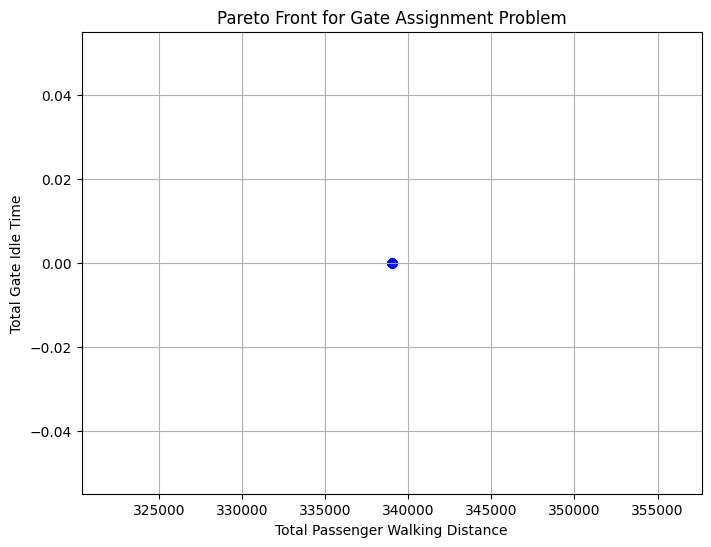

In [ ]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import matplotlib.pyplot as plt

# =============================================================================
# Placeholder Data (Replace these values with actual data if desired)
# =============================================================================

# Number of arriving aircraft and available gates
N = 8      # e.g., number of aircraft
G = 4      # e.g., number of gates

# Predefined Parameters for each aircraft (dummy values):
# Arrival times (t_i) and departure times (d_i)
t = np.array([10, 20, 30, 40, 50, 60, 70, 80])    # Example arrival times
d = np.array([15, 25, 35, 45, 55, 65, 75, 85])    # Example departure times

# Number of passengers on each aircraft (W_i)
W = np.array([100, 150, 200, 120, 180, 130, 110, 140])

# Walking distances for each gate (D_j) – for gates 1 through G
D = np.array([300, 400, 500, 600])

# =============================================================================
# Problem Formulation: Gate Assignment Problem using NSGA-II
# =============================================================================
#
# Decision Variables:
#   x = [x_1, x_2, ..., x_N] where each x_i is an integer in {1, 2, ..., G}
#   representing the gate assigned to aircraft i.
#
# Objectives:
#   f1(x) = sum_i ( W_i * D_{x_i} )
#           (Total passenger walking distance)
#
#   f2(x) = sum_{j=1}^{G} sum_{k (consecutive flights at gate j)} max(0, t_{k+1} - d_k)
#           (Total gate idling time)
#

class GateAssignmentProblem(Problem):
    def __init__(self, N, G, t, d, W, D):
        # n_var = N (each aircraft gets a gate assignment)
        # n_obj = 2 (two objectives: walking distance and idle time)
        # Decision variables are integers between 1 and G.
        super().__init__(n_var=N,
                         n_obj=2,
                         n_constr=0,
                         xl=1,
                         xu=G,
                         vtype=int)
        self.N = N
        self.G = G
        self.t = t
        self.d = d
        self.W = W
        self.D = D

    def _evaluate(self, X, out, *args, **kwargs):
        n_solutions = X.shape[0]
        f1 = np.zeros(n_solutions)
        f2 = np.zeros(n_solutions)

        for i in range(n_solutions):
            sol = X[i, :]  # Candidate solution: an array of length N with values in {1,...,G}

            # Objective 1: Total Passenger Walking Distance
            total_distance = 0
            for j in range(self.N):
                gate = int(sol[j])  # Convert to Python int
                total_distance += self.W[j] * self.D[gate - 1]  # gate index offset by 1
            f1[i] = total_distance

            # Objective 2: Total Gate Idling Time
            idle_total = 0
            for gate in range(1, self.G + 1):
                indices = np.where(sol == gate)[0]  # Aircraft assigned to this gate
                if len(indices) <= 1:
                    continue  # No idle time if 0 or 1 flight at this gate
                # Sort these flights by arrival time
                sorted_idx = indices[np.argsort(self.t[indices])]
                for k in range(len(sorted_idx) - 1):
                    gap = max(0, self.t[sorted_idx[k+1]] - self.d[sorted_idx[k]])
                    idle_total += gap
            f2[i] = idle_total

        out["F"] = np.column_stack([f1, f2])

# =============================================================================
# NSGA-II Setup and Execution using pymoo
# =============================================================================

# Instantiate the problem with the placeholder data.
problem = GateAssignmentProblem(N, G, t, d, W, D)

# Set up the NSGA-II algorithm (population size can be tuned)
algorithm = NSGA2(pop_size=100)

# Run the optimization: here, we run for 200 generations.
res = minimize(problem,
               algorithm,
               termination=('n_gen', 200),
               seed=1,
               verbose=True)

# =============================================================================
# Display and Plot the Results
# =============================================================================

print("#" * 30)
print("Pareto-optimal Gate Assignment Solutions (Decision Variables):")
print(res.X)  # Each row is a candidate solution: an 8-element integer vector.

print("\nCorresponding Objective Values [Total Walking Distance, Total Gate Idle Time]:")
print(np.round(res.F, 2))

# Plot the Pareto front:
plt.figure(figsize=(8,6))
plt.scatter(res.F[:, 0], res.F[:, 1], c='blue', marker='o')
plt.xlabel('Total Passenger Walking Distance')
plt.ylabel('Total Gate Idle Time')
plt.title('Pareto Front for Gate Assignment Problem')
plt.grid(True)
plt.show()


In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 51.4 MB/s eta 0:00:00


In [ ]:
# the optimal solution

In [ ]:
import pulp as pl

# ----------------------------
# Placeholder Data
# ----------------------------
# Number of arriving aircraft (N) and number of gates (G)
N = 8      # e.g., number of aircraft (assumed sorted by arrival time)
G = 4      # e.g., number of gates

# Predefined Parameters (replace with actual data if available)
# For each aircraft i (i = 1,...,N):
# Arrival times:   t_i
# Departure times: d_i
# Passenger counts: W_i
t = [10, 20, 30, 40, 50, 60, 70, 80]     # Arrival times
d = [15, 25, 35, 45, 55, 65, 75, 85]       # Departure times
W = [100, 150, 200, 120, 180, 130, 110, 140]  # Number of passengers

# For each gate j (j = 1,...,G):
# Walking distances from gate j to key locations: D_j
D = [300, 400, 500, 600]

# Weight for weighted-sum objective (0 <= lambda <= 1)
lam = 0.5

# ----------------------------
# MILP Formulation using PuLP
# ----------------------------
#
# Decision Variables:
#   For each aircraft i and each gate j, define a binary variable:
#       y[i,j] = 1 if aircraft i is assigned to gate j, 0 otherwise.
#
#   Each aircraft must be assigned to exactly one gate:
#       for all i: sum_{j=1}^{G} y[i,j] = 1.
#
# Objective 1: Total Passenger Walking Distance
#   f1 = sum_{i=1}^{N} sum_{j=1}^{G} (W_i * D_j * y[i,j])
#
# To model Gate Idling Time (Objective 2), we assume the aircraft are sorted by arrival time.
# For consecutive aircraft (i and i+1) that are assigned to the same gate,
#   the idle time is: gap_i = max(0, t_{i+1} - d_i).
#
# To capture this, we introduce binary variables:
#   For i = 1,...,N-1 and for each gate j:
#       z[i,j] = 1 if both aircraft i and i+1 are assigned to gate j, 0 otherwise.
#
# The constraints for z are:
#       z[i,j] <= y[i,j]
#       z[i,j] <= y[i+1,j]
#       z[i,j] >= y[i,j] + y[i+1,j] - 1.
#
# Then Objective 2 is:
#   f2 = sum_{i=1}^{N-1} (t_{i+1} - d_i) * (sum_{j=1}^{G} z[i,j])
#
# Finally, we minimize the weighted sum:
#       minimize lam * f1 + (1 - lam) * f2.
#

# Create the MILP model
prob = pl.LpProblem("Gate_Assignment", pl.LpMinimize)

# Binary variables y[i,j] for assignment: i = 0,...,N-1, j = 0,...,G-1
y = {(i, j): pl.LpVariable(f"y_{i}_{j}", cat=pl.LpBinary)
     for i in range(N) for j in range(G)}

# Each aircraft must be assigned to exactly one gate.
for i in range(N):
    prob += pl.lpSum([y[i, j] for j in range(G)]) == 1, f"Aircraft_{i}_assignment"

# Binary variables z[i,j] for consecutive assignment indicator (for i = 0,...,N-2)
z = {(i, j): pl.LpVariable(f"z_{i}_{j}", cat=pl.LpBinary)
     for i in range(N-1) for j in range(G)}

# Link z and y: for all i=0,...,N-2 and j=0,...,G-1
for i in range(N-1):
    for j in range(G):
        prob += z[i, j] <= y[i, j], f"z_le_y_{i}_{j}"
        prob += z[i, j] <= y[i+1, j], f"z_le_y_next_{i}_{j}"
        prob += z[i, j] >= y[i, j] + y[i+1, j] - 1, f"z_ge_ysum_{i}_{j}"

# Objective 1: Total Passenger Walking Distance
f1 = pl.lpSum([W[i] * D[j] * y[i, j] for i in range(N) for j in range(G)])

# Objective 2: Total Gate Idle Time
# (Assuming aircraft are sorted by arrival time: t[i] <= t[i+1])
f2 = pl.lpSum([(t[i+1] - d[i]) * pl.lpSum([z[i, j] for j in range(G)]) for i in range(N-1)])

# Combined weighted objective
prob += lam * f1 + (1 - lam) * f2, "Weighted_Objective"

# ----------------------------
# Solve the MILP model using PuLP's solver (e.g., CBC)
# ----------------------------
prob.solve()

# ----------------------------
# Display the Optimal Solution
# ----------------------------
print("Optimal Gate Assignment:")
for i in range(N):
    for j in range(G):
        if pl.value(y[i, j]) > 0.5:
            print(f"Aircraft {i+1} is assigned to Gate {j+1}")

print("\nObjective Values:")
print("Total Passenger Walking Distance (f1):", pl.value(f1))
print("Total Gate Idle Time (f2):", pl.value(f2))
print("Weighted Objective Value:", pl.value(prob.objective))


Optimal Gate Assignment:
Aircraft 1 is assigned to Gate 1
Aircraft 2 is assigned to Gate 1
Aircraft 3 is assigned to Gate 1
Aircraft 4 is assigned to Gate 1
Aircraft 5 is assigned to Gate 1
Aircraft 6 is assigned to Gate 1
Aircraft 7 is assigned to Gate 1
Aircraft 8 is assigned to Gate 1

Objective Values:
Total Passenger Walking Distance (f1): 339000.0
Total Gate Idle Time (f2): 35.0
Weighted Objective Value: 169517.5
